# 3

In [168]:
import numpy as np
import scipy.io.wavfile as wavfile
import soundfile as sf

clean1, sr_clean1  = sf.read("clean1.wav")
distorted1, sr_distorted1  = sf.read("distorted1.wav")
distortd2, sr_distorted2 = sf.read("distorted2.wav")

max_length = max(len(clean1), len(distorted1), len(distortd2))
clean1 = np.pad(clean1, (0, max_length - len(clean1)))
distorted1 = np.pad(distorted1, (0, max_length - len(distorted1)))
distortd2 = np.pad(distortd2, (0, max_length - len(distortd2)))

def get_freq_response(clean, distorted):
    H = np.fft.fft(clean) / np.fft.fft(distorted)
    return H
def get_inverse_response(H):
    return 1 / H
def apply_inverse_response(distorted, inverse_response):
    return np.fft.ifft(np.fft.fft(distorted) * inverse_response).real

freq_response = get_freq_response(clean1, distorted1)
inverse_response = get_inverse_response(freq_response)
clean2 = apply_inverse_response(distortd2, inverse_response)

sf.write("recovered2.wav", clean2, sr_distorted2)







discussion :
pad to make them equal
devide fft of output to input to find response
1/response is inverse response whis applied to  distorted and then use ifft to get the clean signal and save it.

# 2 

#### 1.
$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) e^{j\frac{2\pi kn}{N}}
$$


#### 2,3.

In [169]:
import numpy as np

def fft(signal):
    N = len(signal)
    if N <= 1:
        return signal

    even = fft(signal[0::2])
    odd = fft(signal[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd])



input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
dft_result = fft(input_signal)


def ifft_1(dft_coefficients):
    N = len(dft_coefficients)
    if N <= 1:
        return dft_coefficients

    # Divide the coefficients into even and odd parts
    even = ifft_1(dft_coefficients[0::2])
    odd = ifft_1(dft_coefficients[1::2])

    factor = np.exp(2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd]) / N
def ifft(dft_coefficients):
    return ifft_1(dft_coefficients) * len(dft_coefficients)


recovered_signal = ifft(dft_result)
print("Recovered signal:", recovered_signal)




Recovered signal: [1.-8.05762061e-16j 2.-6.94283679e-16j 3.-5.83717456e-16j
 4.+1.92547715e-16j 5.-6.06602211e-16j 6.+2.61419413e-16j
 7.+3.66468490e-17j 8.+5.50063836e-16j]


#### 4.

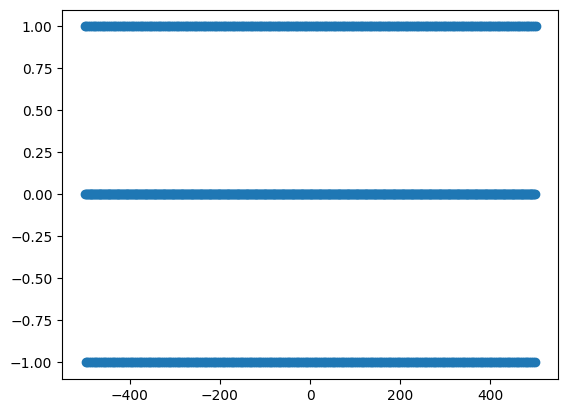

In [170]:
import numpy as np
import matplotlib.pyplot as plt
T = 1/2
N = 1000
n = np.arange(-500, 501)
x = np.cos(np.pi * n * T)
plt.scatter(n, x)
plt.show() 

#### 5.
$$
\delta(\omega - 1) + \delta(\omega + 1)

$$


#### 6. 



1024


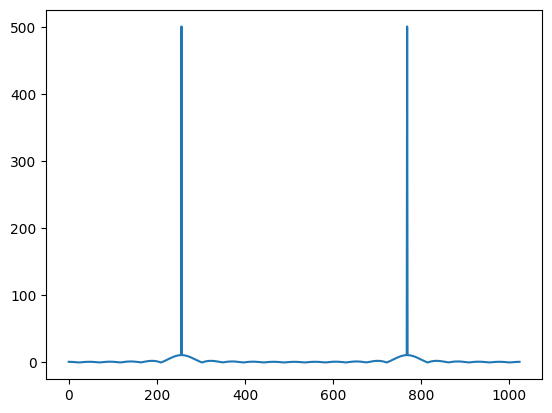

In [171]:
x_p = np.pad(x, (0, 23))
print(len(x_p))
fft_result = fft(x_p) 

plt.plot(np.abs(fft_result))


almost equal to x(w)

#### 7.

c:\Users\moeen\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


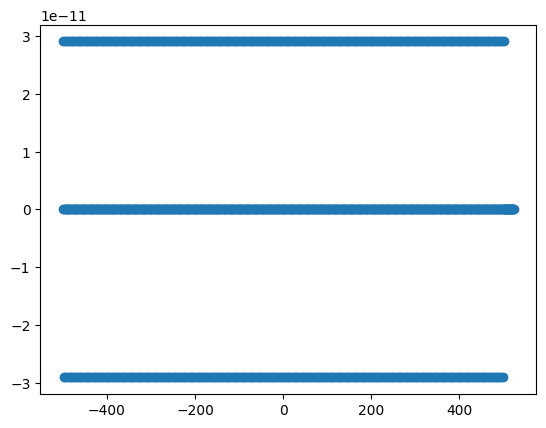

In [172]:
recovered_signal = ifft(fft_result)
n_p = np.arange(-500, 524) 
plt.scatter(n_p, recovered_signal)


yes.
#### 8

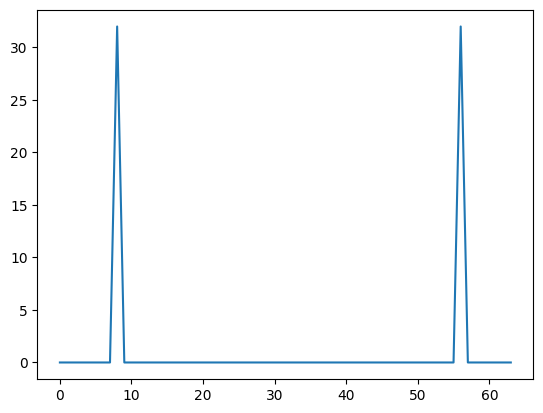

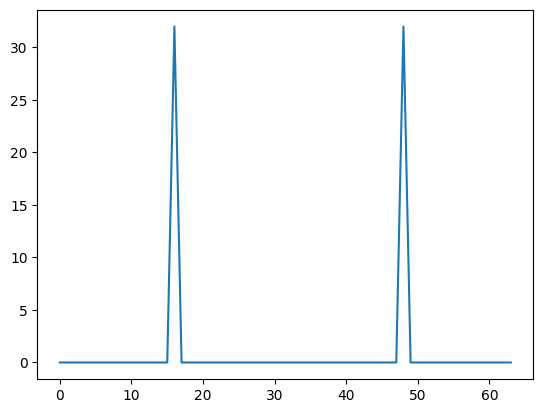

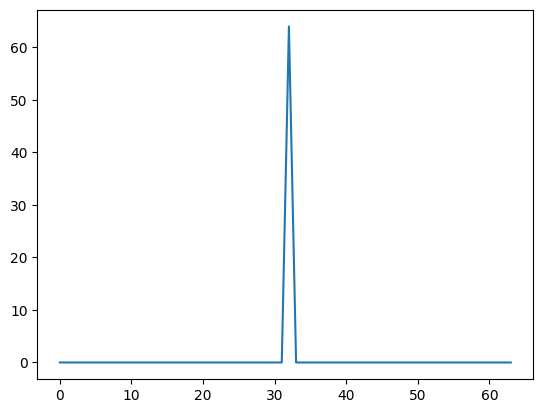

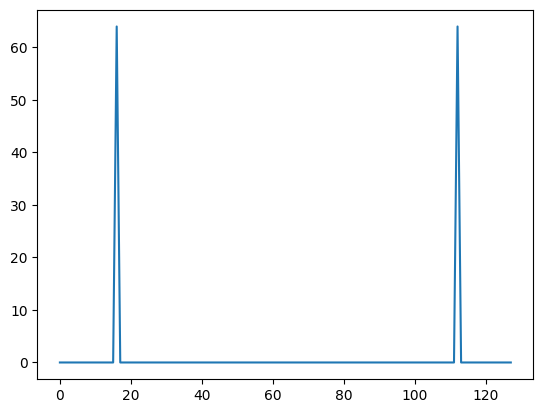

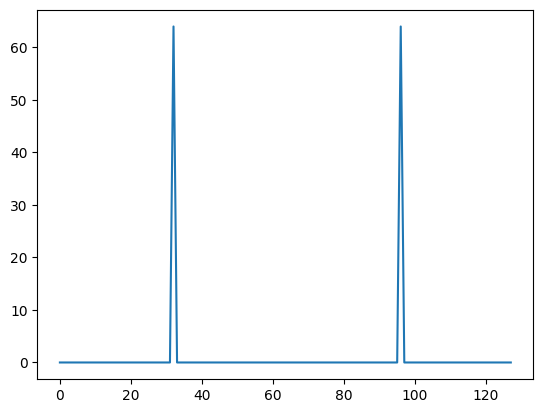

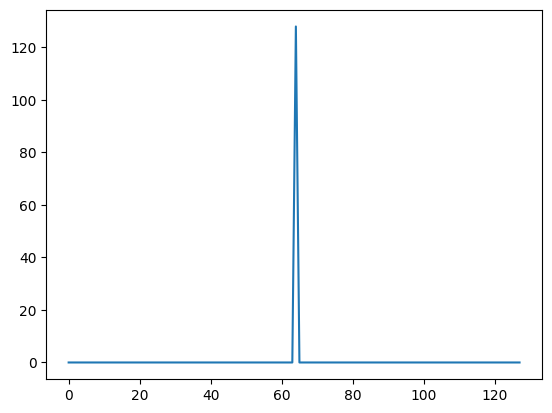

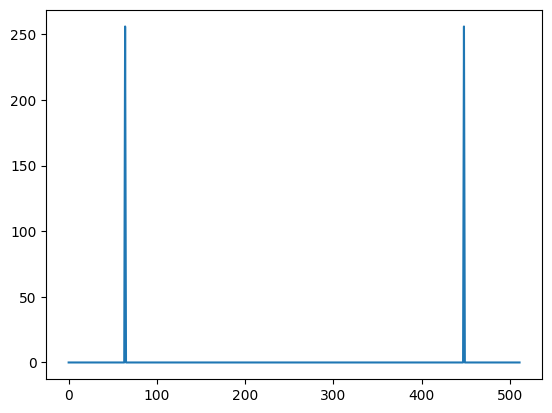

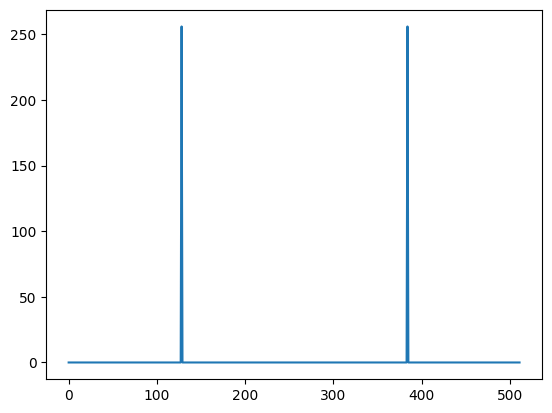

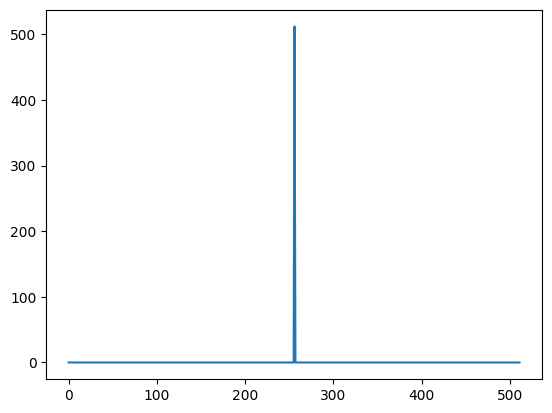

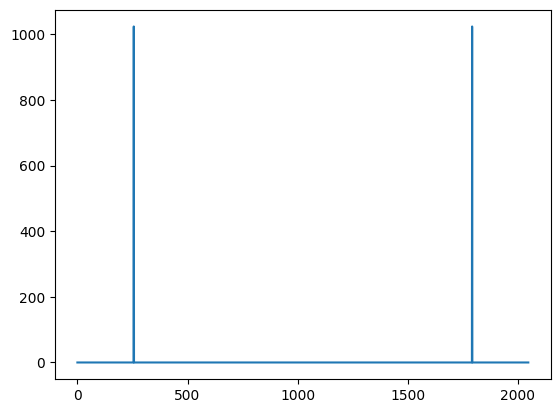

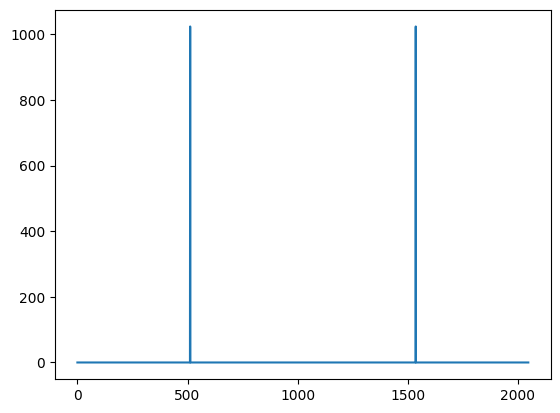

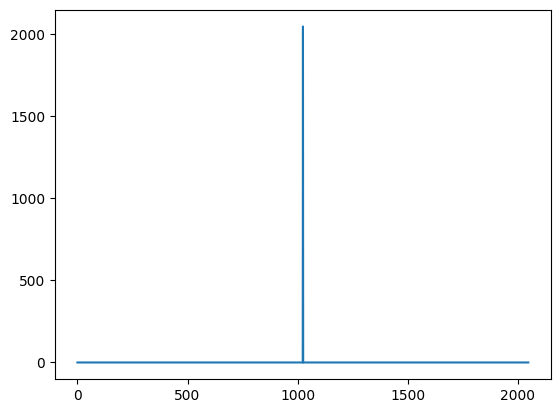

In [173]:
#Show the effects of changing N and T on the DFT of 𝑥[𝑛], in different plots.
Ns = [63,127, 511, 2047]
Ts = [1/4,1/2, 1]
for N in Ns:
    for T in Ts:
        n = np.arange(-N//2, N//2 + 1)
        xx = np.cos(np.pi * n * T)
        fft_result = fft(xx)
        plt.plot(np.abs(fft_result))
        plt.show()

# 4

array([0.00040454, 0.00040454, 0.00040454, ..., 0.00040454, 0.00040454,
       0.00040454])

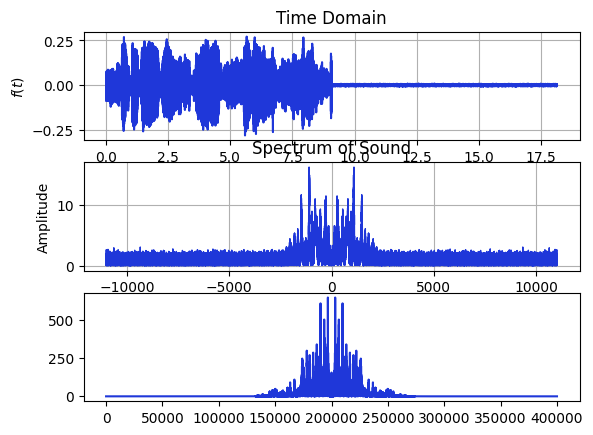

In [174]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf


y,fs = sf.read('noisy1.wav')


plt.subplot(3, 1, 1)
t = np.arange(len(y)) / fs
plt.plot(t, y, color="#1F37D9")
plt.title('Time Domain')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid(True)

start_idx = int(9 * fs)
y_segment = y[start_idx:]
freq = np.fft.fftshift(np.fft.fftfreq(len(y_segment), d=1/fs))
Y = np.fft.fftshift(np.fft.fft(y_segment))
plt.subplot(3, 1, 2)
plt.plot(freq, np.abs(Y), linewidth=1, color="#1F37D9")
plt.title('Spectrum of Sound')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

def filt(y):
    N = 10
    Fc2 = 3000
    b, a = scipy.signal.butter(N, [ Fc2], btype='lowpass', fs=fs)

    return scipy.signal.lfilter(b, a, y)

dataout = filt(y)
plt.subplot(3, 1, 3)
plt.plot( np.abs(np.fft.fftshift(np.fft.fft(dataout))), color="#1F37D9")

sf.write('newSound.wav',  dataout,fs)
np.abs(np.fft.fftshift(np.fft.fft(dataout)))

# 1

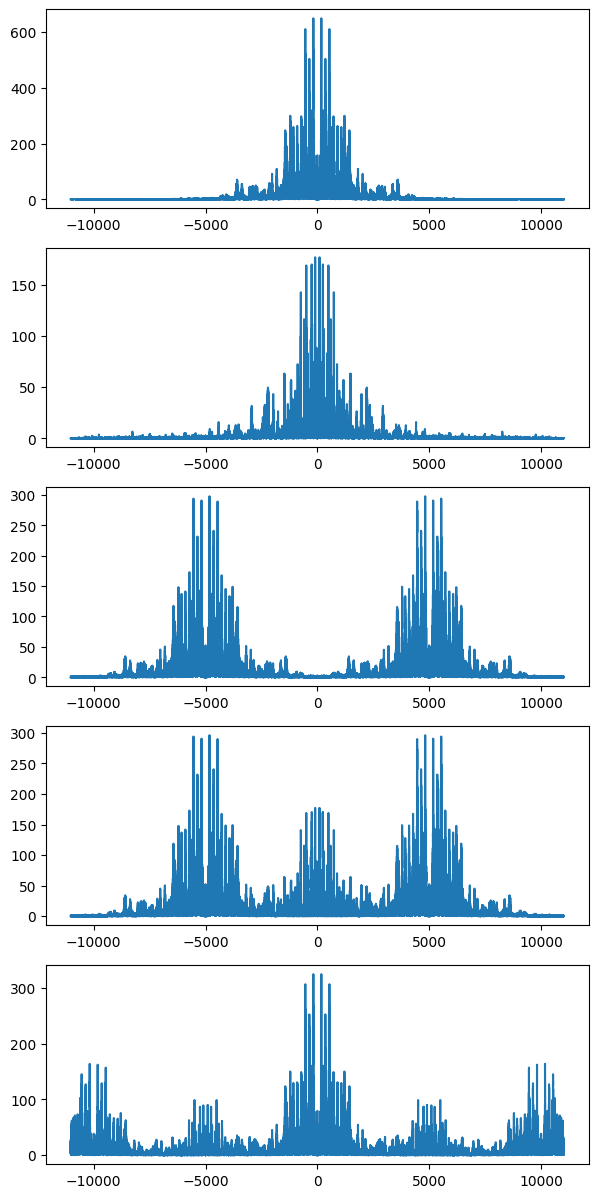

In [184]:
plt.figure(figsize=(7,15))
# open music file 1 an 2
music1, fs1 = sf.read('music1.wav')
music2, fs2 = sf.read('music2.wav')
freq1 = np.fft.fftshift(np.fft.fftfreq(len(music1), d=1/fs1))
freq2 = np.fft.fftshift(np.fft.fftfreq(len(music2), d=1/fs2))
t1 = np.arange(len(music1)) / fs1
t2 = np.arange(len(music1)) / fs2


fft_music1 = np.fft.fft(music1)
fft_music2 = np.fft.fft(music2)
# plot fft of music1
plt.subplot(5, 1, 1)
plt.plot(freq1, np.abs(np.fft.fftshift(fft_music1)))
plt.subplot(5, 1, 2)
plt.plot(freq2, np.abs(np.fft.fftshift(fft_music2)))

# frequency shift     
freq_shift = 5000
car1 = np.cos(2*np.pi*freq_shift*t1)  
music1_shifted  = music1 * car1
plt.subplot(5, 1, 3)
plt.plot(freq1, np.abs(np.fft.fftshift(np.fft.fft(music1_shifted))))
#frequncey_shift = np.fft.fftshift(fft_music1) * np.exp(1j * 2 * np.pi * freq_shift * np.arange(len(music1)) / len(music1))
#music1_shifted = np.abs(np.fft.ifft(frequncey_shift))
sf.write('music1_shifted.wav', music1_shifted, fs1)

# sum  music1 and music2
#fft_sum = music1_shifted + music2
sum1 = music1_shifted + music2

plt.subplot(5, 1, 4)
plt.plot(freq1, np.abs(np.fft.fftshift(np.fft.fft(sum1))))


# inverse fft
# sum = np.abs(np.fft.ifft(fft_sum))
sf.write('sum.wav', sum1, fs1)

# frequency shift sum
#freq_shift = 1000
#frequncey_shift_sum = np.fft.fftshift(fft_sum) * np.exp(1j * 2 * np.pi * freq_shift * np.arange(len(sum)) / len(sum))

frequncey_shift_sum = sum1 * car1
#sum_shifted = np.abs(np.fft.ifft(frequncey_shift_sum))
plt.subplot(5, 1, 5)
plt.plot(freq1, np.abs(np.fft.fftshift(np.fft.fft(frequncey_shift_sum))))

sf.write('sum_shifted.wav', frequncey_shift_sum, fs1)






1 - با تغییر فرکانس ها صدا ها تغییر می کنند و دیگر واضح نیستند



2 -   دومی ، چون در فرکانس های خود قرار دارد و دومی  و قدرت اولی کم شده



3 - با این کار چون دو بار کسینوس باعث میشود دوباره در مکان اولیه قرار بگیرد و دوباره آن پخش می شود چون نصف اندازه آن همچنان بیشتر از اولی است.